1. Introduction

This project aims to predict house prices using different machine learning regression models by analyzing housing features such as area, number of rooms, and amenities.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Dataset Loading

The house price dataset is loaded directly from a GitHub repository using Pandas for easy access and reproducibility.

In [29]:
url = "https://raw.githubusercontent.com/softwareWCU/Machine-Learning-Regression-Models-using-House-Price-Dataset/main/Housing%20Price.csv"

df = pd.read_csv(url)

3. Dataset Inspection

The dataset’s shape, column names, and sample rows are examined to understand the structure and contents of the data

In [30]:
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


4. Data Exploration (EDA)

Basic exploratory analysis is performed to check missing values and understand relationships between numerical features using correlation analysis.

In [31]:
print("Columns:\n", df.columns)
print("\nMissing values:\n", df.isnull().sum())
print("\nDataset Info:")
df.info()


Columns:
 Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad   

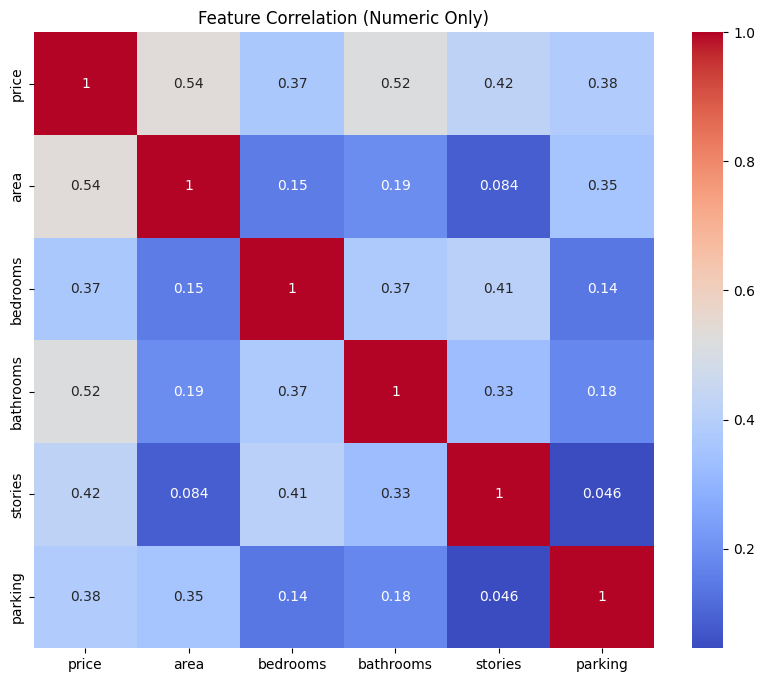

In [32]:
plt.figure(figsize=(10,8))

numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")

plt.title("Feature Correlation (Numeric Only)")
plt.show()

5. Handling Categorical Variables

Categorical features such as “yes/no” and furnishing status are converted into numerical format using one-hot encoding to make them suitable for machine learning models.

In [33]:
df_encoded = pd.get_dummies(df, drop_first=True)

print("New shape after encoding:", df_encoded.shape)
df_encoded.head()

New shape after encoding: (545, 14)


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [34]:
print(df_encoded.columns)


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')


6. Feature and Target Selection

Independent variables (house features) are separated from the dependent variable (house price) to prepare the data for supervised learning.

In [35]:
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]

In [36]:
target_column = "price"

X = df_encoded.drop(target_column, axis=1)
y = df_encoded[target_column]

7. Train–Test Split

The dataset is split into training and testing sets to evaluate model performance on unseen data

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (436, 13)
Testing size: (109, 13)


8. Feature Scaling

Standardization is applied to ensure all numerical features contribute equally, especially for distance-based models

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

9. Linear Regression

A basic regression model is trained to establish a baseline relationship between house features and price.

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lin = lin_reg.predict(X_test_scaled)

print("Linear Regression R²:", r2_score(y_test, y_pred_lin))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))


Linear Regression R²: 0.6529242642153177
Linear Regression RMSE: 1324506.96009144


11. Polynomial Regression

Polynomial regression captures non-linear relationships between features and house prices by expanding feature interactions.

In [40]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred_poly = poly_reg.predict(X_test_poly)

print("Polynomial Regression R²:", r2_score(y_test, y_pred_poly))
print("Polynomial Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))


Polynomial Regression R²: 0.6237689217365155
Polynomial Regression RMSE: 1379016.466162188


12. K-Nearest Neighbors (KNN) Regression

KNN regression predicts house prices based on the average price of the most similar houses.

In [41]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("KNN Regression R²:", r2_score(y_test, y_pred_knn))
print("KNN Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))


KNN Regression R²: 0.6134197563748457
KNN Regression RMSE: 1397854.4263471079


13. Decision Tree Regression

A decision tree model learns decision rules from the data to model complex and non-linear price patterns.

In [42]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

y_pred_dt = dt.predict(X_test_scaled)

print("Decision Tree R²:", r2_score(y_test, y_pred_dt))
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))


Decision Tree R²: 0.4771459275854347
Decision Tree RMSE: 1625669.904259373


14. Model Evaluation

Regression models are evaluated using R² score and RMSE to measure accuracy and prediction error.

15. Model Comparison

All models’ performance metrics are compared to identify the best regression approach for house price prediction.

In [43]:
results = pd.DataFrame({
    "Model": ["Linear", "Polynomial", "KNN", "Decision Tree"],
    "R2 Score": [
        r2_score(y_test, y_pred_lin),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test, y_pred_knn),
        r2_score(y_test, y_pred_dt)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lin)),
        np.sqrt(mean_squared_error(y_test, y_pred_poly)),
        np.sqrt(mean_squared_error(y_test, y_pred_knn)),
        np.sqrt(mean_squared_error(y_test, y_pred_dt))
    ]
})

results


,Model,R2 Score,RMSE
0,Linear,0.652924,1.324507e+06
1,Polynomial,0.623769,1.379016e+06
2,KNN,0.613420,1.397854e+06
3,Decision Tree,0.477146,1.625670e+06


16. Prediction on Unseen Data

The trained model is used to predict house prices for new, unseen inputs to demonstrate real-world applicability.

In [44]:
new_house = X.iloc[[0]]

new_house_scaled = scaler.transform(new_house)
predicted_price = lin_reg.predict(new_house_scaled)

print("Predicted House Price:", predicted_price[0])


Predicted House Price: 7968276.126387373
